In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix

from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv('cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## EDA

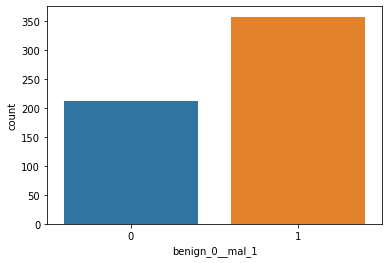

In [5]:
sns.countplot(x='benign_0__mal_1' , data = df)

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


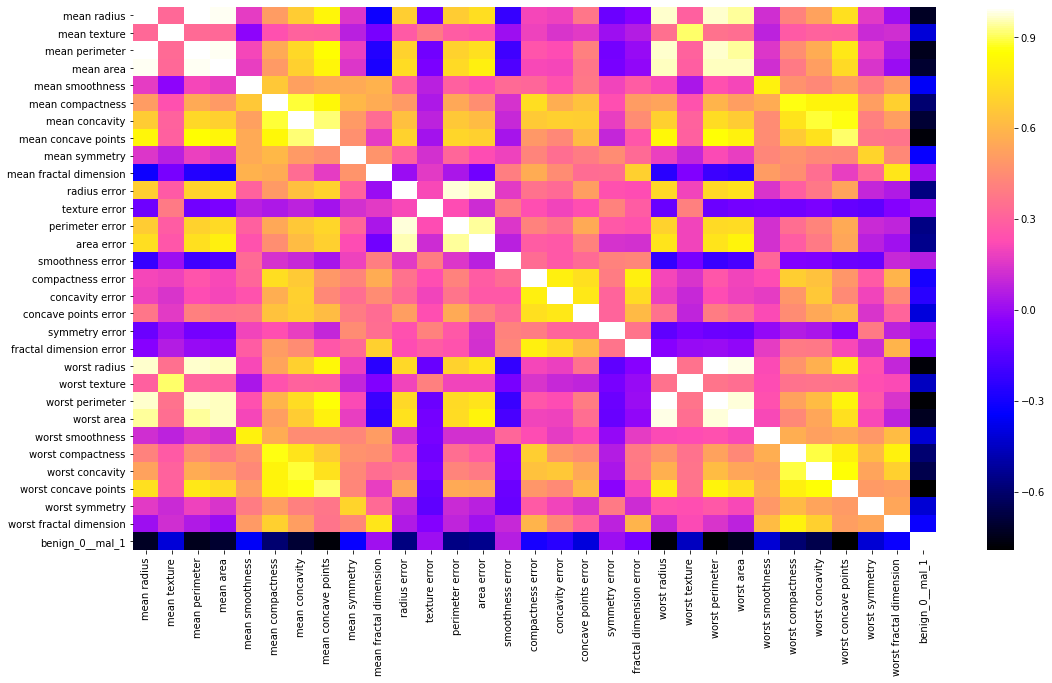

In [7]:
plt.figure(figsize = (18 , 10))
sns.heatmap(df.corr() , cmap = 'gnuplot2')

In [8]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

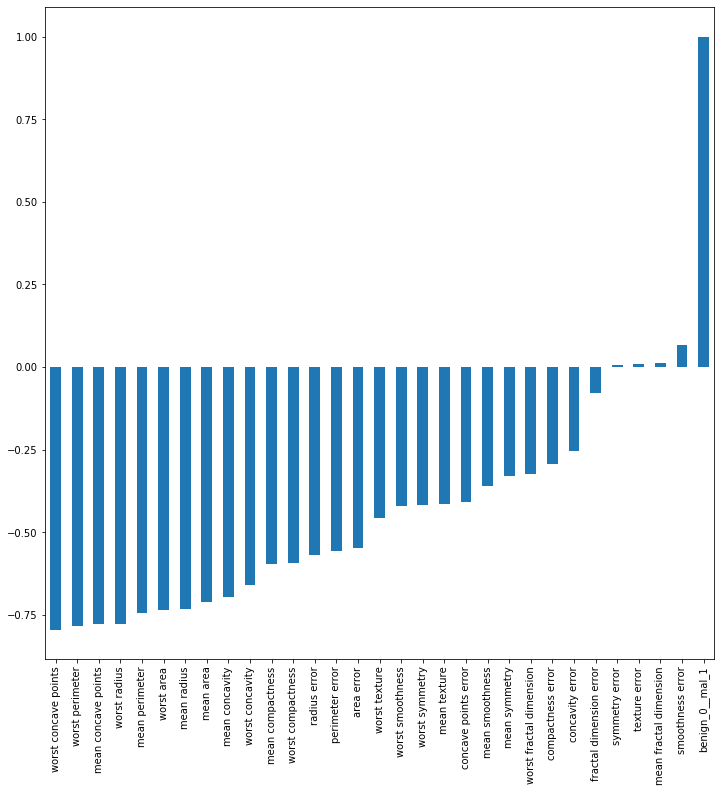

In [9]:
plt.figure(figsize = (12 , 12))
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

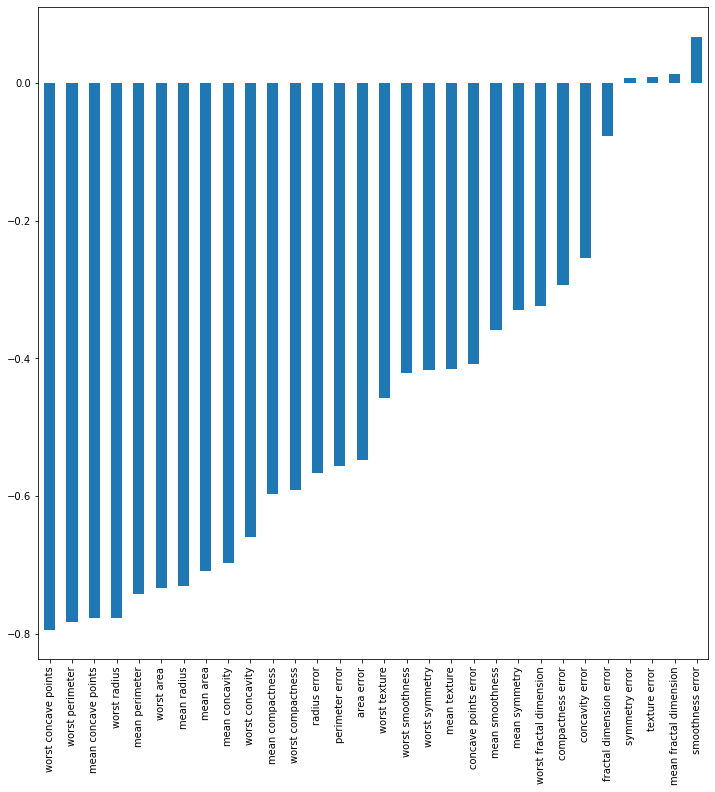

In [10]:
plt.figure(figsize = (12 , 12))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

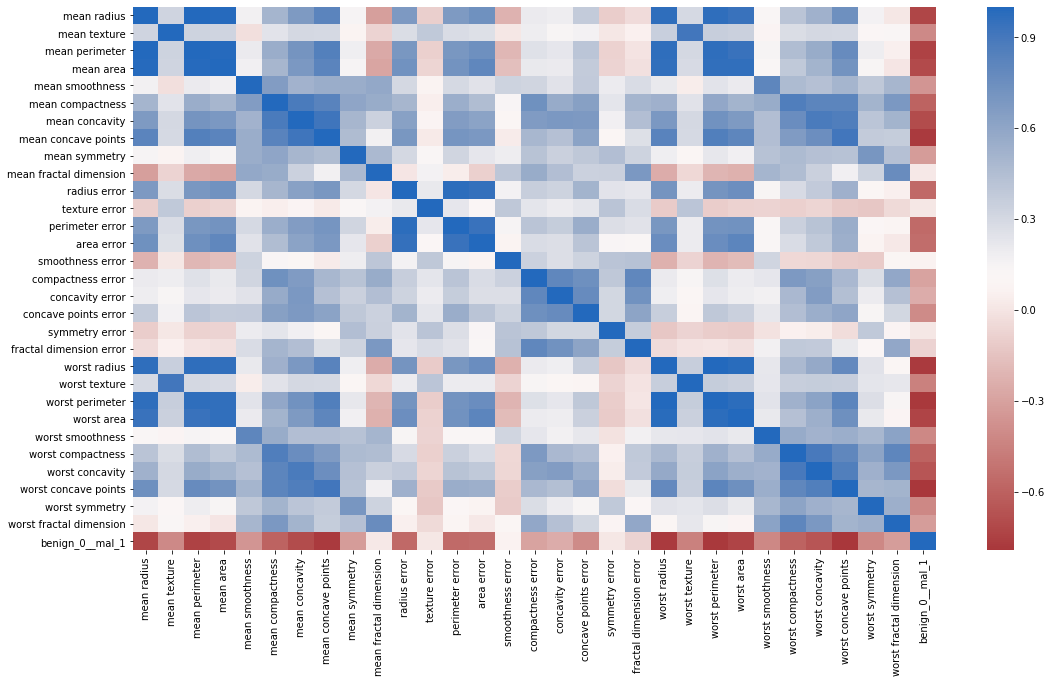

In [11]:
plt.figure(figsize = (18 , 10))
sns.heatmap(df.corr() , cmap = 'vlag_r')

## Train Test Split

In [12]:
X = df.drop('benign_0__mal_1' , axis = 1).values
y = df['benign_0__mal_1'].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)
X_test

array([[1.236e+01, 1.854e+01, 7.901e+01, ..., 8.442e-02, 2.983e-01,
        7.185e-02],
       [1.404e+01, 1.598e+01, 8.978e+01, ..., 7.453e-02, 2.725e-01,
        7.234e-02],
       [1.291e+01, 1.633e+01, 8.253e+01, ..., 8.235e-02, 3.024e-01,
        6.949e-02],
       ...,
       [1.760e+01, 2.333e+01, 1.190e+02, ..., 1.996e-01, 2.301e-01,
        1.224e-01],
       [1.162e+01, 1.818e+01, 7.638e+01, ..., 1.416e-01, 2.660e-01,
        9.270e-02],
       [1.550e+01, 2.108e+01, 1.029e+02, ..., 2.134e-01, 3.003e-01,
        1.048e-01]])


## Scaling Data

In [14]:
scaler = MinMaxScaler()

In [15]:
scaler.fit(X_train)
X_train

array([[1.317e+01, 1.822e+01, 8.428e+01, ..., 1.045e-01, 2.235e-01,
        6.925e-02],
       [1.262e+01, 1.715e+01, 8.062e+01, ..., 9.851e-02, 3.270e-01,
        7.330e-02],
       [1.480e+01, 1.766e+01, 9.588e+01, ..., 8.308e-02, 3.600e-01,
        7.285e-02],
       ...,
       [1.607e+01, 1.965e+01, 1.041e+02, ..., 1.520e-01, 2.650e-01,
        6.387e-02],
       [1.877e+01, 2.143e+01, 1.229e+02, ..., 2.048e-01, 3.679e-01,
        9.870e-02],
       [1.371e+01, 1.868e+01, 8.873e+01, ..., 1.284e-01, 2.849e-01,
        9.031e-02]])

In [16]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [17]:
model = Sequential()
model

In [18]:
model.add(Dense(units = 30 , activation = 'relu'))
model.add(Dense(units = 15 , activation = 'relu'))
model.add(Dense(units = 1 , activation = 'sigmoid'))


model.compile(loss = 'binary_crossentropy' ,  optimizer = 'adam')

## Training the Model 

In [19]:
model.fit(x = X_train , y = y_train , epochs = 600,
          validation_data = (X_test , y_test) , verbose = 1
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 2s 4ms/sample - loss: 0.6630 - val_loss: 0.6387
Epoch 2/600
426/426 [==============================] - 0s 229us/sample - loss: 0.6178 - val_loss: 0.5988
Epoch 3/600
426/426 [==============================] - 0s 205us/sample - loss: 0.5713 - val_loss: 0.5512
Epoch 4/600
426/426 [==============================] - 0s 212us/sample - loss: 0.5153 - val_loss: 0.4943
Epoch 5/600
426/426 [==============================] - 0s 216us/sample - loss: 0.4616 - val_loss: 0.4397
Epoch 6/600
426/426 [==============================] - 0s 233us/sample - loss: 0.4089 - val_loss: 0.3897
Epoch 7/600
426/426 [==============================] - 0s 269us/sample - loss: 0.3633 - val_loss: 0.3445
Epoch 8/600
426/426 [==============================] - 0s 323us/sample - loss: 0.3232 - val_loss: 0.3032
Epoch 9/600
426/426 [==============================] - 0s 291us/sample - loss: 0.2924 - val_loss: 0.2742
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 215us/sample - loss: 0.0502 - val_loss: 0.0986
Epoch 79/600
426/426 [==============================] - 0s 218us/sample - loss: 0.0494 - val_loss: 0.0955
Epoch 80/600
426/426 [==============================] - 0s 206us/sample - loss: 0.0510 - val_loss: 0.1000
Epoch 81/600
426/426 [==============================] - 0s 273us/sample - loss: 0.0493 - val_loss: 0.0951
Epoch 82/600
426/426 [==============================] - 0s 252us/sample - loss: 0.0489 - val_loss: 0.1015
Epoch 83/600
426/426 [==============================] - 0s 255us/sample - loss: 0.0500 - val_loss: 0.0924
Epoch 84/600
426/426 [==============================] - 0s 201us/sample - loss: 0.0487 - val_loss: 0.0968
Epoch 85/600
426/426 [==============================] - 0s 201us/sample - loss: 0.0482 - val_loss: 0.0972
Epoch 86/600
426/426 [==============================] - 0s 276us/sample - loss: 0.0481 - val_loss: 0.0942
Epoch 87/600
426/426 [========================

Epoch 155/600
426/426 [==============================] - 0s 225us/sample - loss: 0.0320 - val_loss: 0.1076
Epoch 156/600
426/426 [==============================] - 0s 274us/sample - loss: 0.0320 - val_loss: 0.1008
Epoch 157/600
426/426 [==============================] - 0s 245us/sample - loss: 0.0318 - val_loss: 0.1012
Epoch 158/600
426/426 [==============================] - 0s 283us/sample - loss: 0.0313 - val_loss: 0.1112
Epoch 159/600
426/426 [==============================] - 0s 250us/sample - loss: 0.0306 - val_loss: 0.1072
Epoch 160/600
426/426 [==============================] - 0s 239us/sample - loss: 0.0308 - val_loss: 0.1080
Epoch 161/600
426/426 [==============================] - 0s 273us/sample - loss: 0.0308 - val_loss: 0.1114
Epoch 162/600
426/426 [==============================] - 0s 264us/sample - loss: 0.0296 - val_loss: 0.1028
Epoch 163/600
426/426 [==============================] - 0s 219us/sample - loss: 0.0294 - val_loss: 0.1054
Epoch 164/600
426/426 [==============

426/426 [==============================] - 0s 179us/sample - loss: 0.0189 - val_loss: 0.1402
Epoch 232/600
426/426 [==============================] - 0s 177us/sample - loss: 0.0257 - val_loss: 0.1020
Epoch 233/600
426/426 [==============================] - 0s 176us/sample - loss: 0.0190 - val_loss: 0.1202
Epoch 234/600
426/426 [==============================] - 0s 178us/sample - loss: 0.0219 - val_loss: 0.1090
Epoch 235/600
426/426 [==============================] - 0s 210us/sample - loss: 0.0177 - val_loss: 0.1133
Epoch 236/600
426/426 [==============================] - 0s 233us/sample - loss: 0.0179 - val_loss: 0.1068
Epoch 237/600
426/426 [==============================] - 0s 221us/sample - loss: 0.0208 - val_loss: 0.1242
Epoch 238/600
426/426 [==============================] - 0s 219us/sample - loss: 0.0181 - val_loss: 0.1014
Epoch 239/600
426/426 [==============================] - 0s 235us/sample - loss: 0.0190 - val_loss: 0.1139
Epoch 240/600
426/426 [============================

426/426 [==============================] - 0s 191us/sample - loss: 0.0112 - val_loss: 0.1319
Epoch 308/600
426/426 [==============================] - 0s 196us/sample - loss: 0.0151 - val_loss: 0.1217
Epoch 309/600
426/426 [==============================] - 0s 204us/sample - loss: 0.0173 - val_loss: 0.1353
Epoch 310/600
426/426 [==============================] - 0s 179us/sample - loss: 0.0121 - val_loss: 0.1308
Epoch 311/600
426/426 [==============================] - 0s 187us/sample - loss: 0.0113 - val_loss: 0.1300
Epoch 312/600
426/426 [==============================] - 0s 202us/sample - loss: 0.0101 - val_loss: 0.1303
Epoch 313/600
426/426 [==============================] - 0s 211us/sample - loss: 0.0098 - val_loss: 0.1181
Epoch 314/600
426/426 [==============================] - 0s 177us/sample - loss: 0.0100 - val_loss: 0.1342
Epoch 315/600
426/426 [==============================] - 0s 193us/sample - loss: 0.0104 - val_loss: 0.1202
Epoch 316/600
426/426 [============================

426/426 [==============================] - 0s 211us/sample - loss: 0.0064 - val_loss: 0.1420
Epoch 384/600
426/426 [==============================] - 0s 201us/sample - loss: 0.0065 - val_loss: 0.1551
Epoch 385/600
426/426 [==============================] - 0s 234us/sample - loss: 0.0096 - val_loss: 0.1406
Epoch 386/600
426/426 [==============================] - 0s 223us/sample - loss: 0.0061 - val_loss: 0.1582
Epoch 387/600
426/426 [==============================] - 0s 221us/sample - loss: 0.0061 - val_loss: 0.1486
Epoch 388/600
426/426 [==============================] - 0s 207us/sample - loss: 0.0058 - val_loss: 0.1470
Epoch 389/600
426/426 [==============================] - 0s 210us/sample - loss: 0.0059 - val_loss: 0.1599
Epoch 390/600
426/426 [==============================] - 0s 207us/sample - loss: 0.0057 - val_loss: 0.1532
Epoch 391/600
426/426 [==============================] - 0s 204us/sample - loss: 0.0057 - val_loss: 0.1560
Epoch 392/600
426/426 [============================

426/426 [==============================] - 0s 257us/sample - loss: 0.0031 - val_loss: 0.1884
Epoch 460/600
426/426 [==============================] - 0s 273us/sample - loss: 0.0033 - val_loss: 0.1853
Epoch 461/600
426/426 [==============================] - 0s 244us/sample - loss: 0.0035 - val_loss: 0.1661
Epoch 462/600
426/426 [==============================] - 0s 276us/sample - loss: 0.0035 - val_loss: 0.1827
Epoch 463/600
426/426 [==============================] - 0s 244us/sample - loss: 0.0041 - val_loss: 0.1972
Epoch 464/600
426/426 [==============================] - 0s 230us/sample - loss: 0.0042 - val_loss: 0.1673
Epoch 465/600
426/426 [==============================] - 0s 400us/sample - loss: 0.0030 - val_loss: 0.1836
Epoch 466/600
426/426 [==============================] - 0s 251us/sample - loss: 0.0030 - val_loss: 0.1912
Epoch 467/600
426/426 [==============================] - 0s 234us/sample - loss: 0.0030 - val_loss: 0.1852
Epoch 468/600
426/426 [============================

426/426 [==============================] - 0s 257us/sample - loss: 0.0016 - val_loss: 0.2204
Epoch 536/600
426/426 [==============================] - 0s 248us/sample - loss: 0.0016 - val_loss: 0.2049
Epoch 537/600
426/426 [==============================] - 0s 259us/sample - loss: 0.0015 - val_loss: 0.2157
Epoch 538/600
426/426 [==============================] - 0s 247us/sample - loss: 0.0014 - val_loss: 0.2198
Epoch 539/600
426/426 [==============================] - 0s 251us/sample - loss: 0.0015 - val_loss: 0.2213
Epoch 540/600
426/426 [==============================] - 0s 267us/sample - loss: 0.0020 - val_loss: 0.2228
Epoch 541/600
426/426 [==============================] - 0s 263us/sample - loss: 0.0016 - val_loss: 0.2242
Epoch 542/600
426/426 [==============================] - 0s 248us/sample - loss: 0.0014 - val_loss: 0.2292
Epoch 543/600
426/426 [==============================] - 0s 254us/sample - loss: 0.0014 - val_loss: 0.2301
Epoch 544/600
426/426 [============================

In [20]:
model_loss = pd.DataFrame(model.history.history)
model_loss

,loss,val_loss
0,0.663007,0.638708
1,0.617813,0.598847
2,0.571314,0.551192
3,0.515335,0.494281
4,0.461587,0.439712
...,...,...
595,0.000852,0.261634
596,0.000950,0.258761
597,0.000853,0.257718
598,0.001081,0.270270


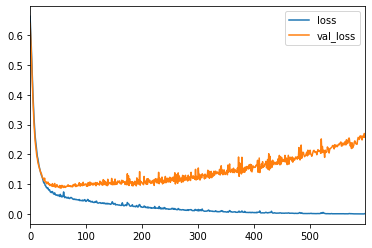

In [21]:
model_loss.plot()

In [22]:
model.fit(x = X_train , y = y_train , epochs = 300 ,
          validation_data = (X_test , y_test) , verbose = 1
          )

Train on 426 samples, validate on 143 samples
Epoch 1/300
426/426 [==============================] - 0s 219us/sample - loss: 0.0041 - val_loss: 0.2897
Epoch 2/300
426/426 [==============================] - 0s 216us/sample - loss: 0.0036 - val_loss: 0.2940
Epoch 3/300
426/426 [==============================] - 0s 210us/sample - loss: 0.0092 - val_loss: 0.3832
Epoch 4/300
426/426 [==============================] - 0s 243us/sample - loss: 0.0102 - val_loss: 0.2944
Epoch 5/300
426/426 [==============================] - 0s 256us/sample - loss: 0.0043 - val_loss: 0.2788
Epoch 6/300
426/426 [==============================] - 0s 253us/sample - loss: 0.0014 - val_loss: 0.3255
Epoch 7/300
426/426 [==============================] - 0s 243us/sample - loss: 0.0015 - val_loss: 0.3060
Epoch 8/300
426/426 [==============================] - 0s 242us/sample - loss: 0.0012 - val_loss: 0.2652
Epoch 9/300
426/426 [==============================] - 0s 269us/sample - loss: 0.0018 - val_loss: 0.2520
Epoch 10/

426/426 [==============================] - 0s 172us/sample - loss: 4.5784e-04 - val_loss: 0.3040
Epoch 76/300
426/426 [==============================] - 0s 175us/sample - loss: 4.8544e-04 - val_loss: 0.3074
Epoch 77/300
426/426 [==============================] - 0s 170us/sample - loss: 5.3369e-04 - val_loss: 0.3105
Epoch 78/300
426/426 [==============================] - 0s 175us/sample - loss: 5.4586e-04 - val_loss: 0.3097
Epoch 79/300
426/426 [==============================] - 0s 172us/sample - loss: 4.7494e-04 - val_loss: 0.3098
Epoch 80/300
426/426 [==============================] - 0s 184us/sample - loss: 4.5396e-04 - val_loss: 0.3146
Epoch 81/300
426/426 [==============================] - 0s 171us/sample - loss: 4.7554e-04 - val_loss: 0.3125
Epoch 82/300
426/426 [==============================] - 0s 178us/sample - loss: 4.4191e-04 - val_loss: 0.3173
Epoch 83/300
426/426 [==============================] - 0s 181us/sample - loss: 4.4680e-04 - val_loss: 0.3135
Epoch 84/300
426/426 [=

426/426 [==============================] - 0s 205us/sample - loss: 2.7416e-04 - val_loss: 0.3589
Epoch 150/300
426/426 [==============================] - 0s 183us/sample - loss: 3.0014e-04 - val_loss: 0.3516
Epoch 151/300
426/426 [==============================] - 0s 193us/sample - loss: 2.9941e-04 - val_loss: 0.3573
Epoch 152/300
426/426 [==============================] - 0s 204us/sample - loss: 3.2083e-04 - val_loss: 0.3497
Epoch 153/300
426/426 [==============================] - 0s 228us/sample - loss: 2.7821e-04 - val_loss: 0.3602
Epoch 154/300
426/426 [==============================] - 0s 251us/sample - loss: 2.6745e-04 - val_loss: 0.3531
Epoch 155/300
426/426 [==============================] - 0s 184us/sample - loss: 2.7884e-04 - val_loss: 0.3547
Epoch 156/300
426/426 [==============================] - 0s 203us/sample - loss: 2.6046e-04 - val_loss: 0.3551
Epoch 157/300
426/426 [==============================] - 0s 191us/sample - loss: 2.5073e-04 - val_loss: 0.3555
Epoch 158/300
4

Epoch 223/300
426/426 [==============================] - 0s 235us/sample - loss: 1.5339e-04 - val_loss: 0.3986
Epoch 224/300
426/426 [==============================] - 0s 211us/sample - loss: 1.8677e-04 - val_loss: 0.3955
Epoch 225/300
426/426 [==============================] - 0s 209us/sample - loss: 2.1663e-04 - val_loss: 0.3960
Epoch 226/300
426/426 [==============================] - 0s 208us/sample - loss: 1.9539e-04 - val_loss: 0.3983
Epoch 227/300
426/426 [==============================] - 0s 455us/sample - loss: 1.4856e-04 - val_loss: 0.3893
Epoch 228/300
426/426 [==============================] - 0s 195us/sample - loss: 1.3864e-04 - val_loss: 0.3861
Epoch 229/300
426/426 [==============================] - 0s 194us/sample - loss: 1.5059e-04 - val_loss: 0.3860
Epoch 230/300
426/426 [==============================] - 0s 193us/sample - loss: 1.8754e-04 - val_loss: 0.3922
Epoch 231/300
426/426 [==============================] - 0s 200us/sample - loss: 2.4948e-04 - val_loss: 0.3957
E

Epoch 297/300
426/426 [==============================] - 0s 210us/sample - loss: 9.1856e-05 - val_loss: 0.4272
Epoch 298/300
426/426 [==============================] - 0s 202us/sample - loss: 9.0989e-05 - val_loss: 0.4303
Epoch 299/300
426/426 [==============================] - 0s 202us/sample - loss: 8.1802e-05 - val_loss: 0.4343
Epoch 300/300
426/426 [==============================] - 0s 207us/sample - loss: 9.0376e-05 - val_loss: 0.4375


In [23]:
model1_loss = pd.DataFrame(model.history.history)

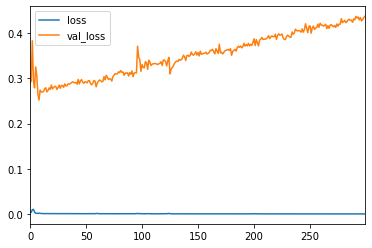

In [24]:
model1_loss.plot()

## Example Two: Early Stopping

Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [25]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [26]:
early_stop = EarlyStopping(monitor = 'val_loss', mode='min', verbose=1, patience=25)

In [27]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6875 - val_loss: 0.6588
Epoch 2/600
426/426 [==============================] - 0s 210us/sample - loss: 0.6410 - val_loss: 0.6148
Epoch 3/600
426/426 [==============================] - 0s 180us/sample - loss: 0.6004 - val_loss: 0.5765
Epoch 4/600
426/426 [==============================] - 0s 178us/sample - loss: 0.5660 - val_loss: 0.5387
Epoch 5/600
426/426 [==============================] - 0s 173us/sample - loss: 0.5308 - val_loss: 0.5027
Epoch 6/600
426/426 [==============================] - 0s 175us/sample - loss: 0.4952 - val_loss: 0.4646
Epoch 7/600
426/426 [==============================] - 0s 173us/sample - loss: 0.4577 - val_loss: 0.4249
Epoch 8/600
426/426 [==============================] - 0s 177us/sample - loss: 0.4190 - val_loss: 0.3835
Epoch 9/600
426/426 [==============================] - 0s 178us/sample - loss: 0.3805 - val_loss: 0.3462
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 203us/sample - loss: 0.0519 - val_loss: 0.1130
Epoch 79/600
426/426 [==============================] - 0s 201us/sample - loss: 0.0535 - val_loss: 0.1137
Epoch 00079: early stopping


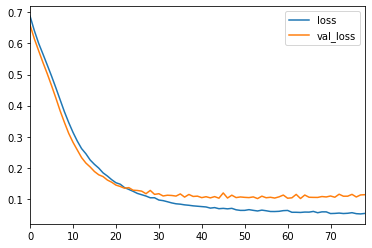

In [28]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Example Three: Adding in DropOut Layers

In [29]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [30]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6999 - val_loss: 0.6807
Epoch 2/600
426/426 [==============================] - 0s 215us/sample - loss: 0.6839 - val_loss: 0.6636
Epoch 3/600
426/426 [==============================] - 0s 236us/sample - loss: 0.6694 - val_loss: 0.6476
Epoch 4/600
426/426 [==============================] - 0s 218us/sample - loss: 0.6489 - val_loss: 0.6324
Epoch 5/600
426/426 [==============================] - 0s 222us/sample - loss: 0.6300 - val_loss: 0.6125
Epoch 6/600
426/426 [==============================] - 0s 219us/sample - loss: 0.6077 - val_loss: 0.5881
Epoch 7/600
426/426 [==============================] - 0s 219us/sample - loss: 0.6040 - val_loss: 0.5642
Epoch 8/600
426/426 [==============================] - 0s 324us/sample - loss: 0.5847 - val_loss: 0.5399
Epoch 9/600
426/426 [==============================] - ETA: 0s - loss: 0.561 - 0s 254us/sample - loss: 0.5677 - val_

426/426 [==============================] - 0s 234us/sample - loss: 0.1134 - val_loss: 0.1004
Epoch 78/600
426/426 [==============================] - 0s 218us/sample - loss: 0.1331 - val_loss: 0.0974
Epoch 79/600
426/426 [==============================] - 0s 204us/sample - loss: 0.1288 - val_loss: 0.1016
Epoch 80/600
426/426 [==============================] - 0s 205us/sample - loss: 0.1096 - val_loss: 0.1182
Epoch 81/600
426/426 [==============================] - 0s 204us/sample - loss: 0.1006 - val_loss: 0.0912
Epoch 82/600
426/426 [==============================] - 0s 213us/sample - loss: 0.1254 - val_loss: 0.0949
Epoch 83/600
426/426 [==============================] - 0s 222us/sample - loss: 0.1012 - val_loss: 0.1042
Epoch 84/600
426/426 [==============================] - 0s 213us/sample - loss: 0.1152 - val_loss: 0.0976
Epoch 85/600
426/426 [==============================] - 0s 233us/sample - loss: 0.1248 - val_loss: 0.1052
Epoch 86/600
426/426 [==============================] - 0s 

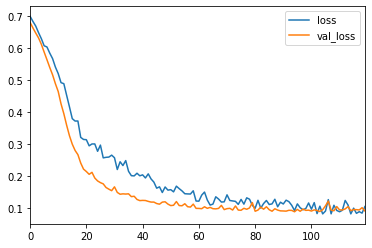

In [31]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Model Evaluation

In [32]:
predictions = model.predict_classes(X_test)
predictions

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [33]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [34]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
